# <center>Customer Churn Analytics in Retail</center>

<center>By Nigel Story</center>

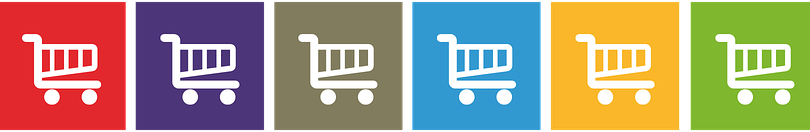

---

## Challenges of Measuring Churn

*Churn rate* is a measure of customer retention and turnover, and it's one of the most important indicators of performance for any customer-focused enterprise. For our uses, we'll be defining churn rate by the following equation:

*Churn Rate* = $\frac{(Lapsed Customers)}{(Total Customers)}$

For subscription-based services, lapsed customers can be measured using the number of customers who unsubscribe over a given period, but in the retail space it can be hard to precisely define the "loss" of a customer. Is it when they haven't shopped for a month? A year? For a business like a popular super market who expects a high frequency of shop from its customers, maybe a month is a reasonable period to determine whether or not a customer is lapsed, but in the luxury retail world, where frequencies by customer can range from a yearly restock on a fragrance to keeping up on a skincare routine every month, it can be very challenging to make a hard determination of when the threshold for "churning" is.

Another present challenge is this: once we know what our churn rate is, what does it tell us, and how do we act on it? A common use of churn rate is to use it conjunction with acquisition rate to gain insights on how business is growing, acquisition rate being defined as below:

*Acquisition Rate* = $\frac{(New Customers)}{(Total Customers)}$

The popular rule of thumb is that **if your rate of acquisition is greater than your rate of churn, then your business is experiencing positive growth**. This would be a great insight to have, but what if you find that your business is shrinking, or even if your business is simply not growing as fast as you would like? While these metrics are informative, they bare little when it comes to informing concrete action.

So our challenges are these:
1. **How can we define the lapse of a customer in a retail setting with naturally low or widely-varying customer shopping frequencies?**

2. **Once we make that determination, how can we turn it into an actionable insight?**

---

## An Alternative to "Lapsed" Customers

To address our first challenge, we'll need to adjust our way of thinking about lapsed customers. Rather than trying to define an absolute binary of lapsed or active customers, we will be looking at a customer's shopping habits and asking the question, **"What is the *probability* that this customer never shops again?"** To answer this question, we'll be relying on the Poisson distribution.

The Poisson distribution is a very popular probabilistic model that seeks to answer the following question: if an event happens at an average rate of $\lambda$ per period, what is the probability of seeing *x* occurances of the event over a fixed time period *t*? Or, in more relevant terms, if a customer shops on average 5 times per year, how likely are they to shop 6 times next year? Let's work it out:

$\mathbb{P}${ customer shops x times given an avg. frequency of $\lambda$ } = $\frac{\lambda^x e^{-\lambda}}{x!}$, where $\lambda$ is our frequency, *x* is the number of shopping events, and *e* is Euler's constant (~2.718).

So for the case of $\lambda$ = 5 and *x* = 6, we get a probability of ~14.6%.

This is a great tool, but we haven't directly addressed our question yet. To get to our question, we'll need to go one layer deeper into the workings of the Poisson distribution.

The Poisson distribution is built around the notion of modelling "arrivals." In our case, the "arrivals" are customer shopping events. The key to modelling arrivals is being able to model inter-arrival times, which would be the time between consecutive shopping events for a given customer. Under the hood, the Poisson distribution is modelling inter-arrival times using exponentially distributed times. This gives us the ability to answer the question, **"What is the probability that a customer will have shopped by time *t*, given their frequency?"** This can be answered using the following formula:

F( t ) = $\mathbb{P}${ customer has shopped by time *t* } = 1 - $e^{-\lambda t}$, where $\lambda$ is the customer's average frequency.

So the probability that a customer with an average yearly frequency of 3 will have shopped in the next year is about 95%.

We can also use this to calculate the probabilty that a customer doesn't shop until *after* time *t* by simply taking 1 - $\mathbb{P}${ customer has shopped by time *t* }. Let's consider the same customer with frequency 3 and see what the probability is that they shop after a year has passed:

S( t ) = 1 - F( t ) = $e^{-\lambda t}$ 

=> S( 1 ) = $e^{-\lambda}$ = ~5%, given a frequency of $\lambda$ = 3.

So given a customer with a yearly shopping frequency of 3 who hasn't shopped in a year, there is only 5% chance of them shopping again. Or to put it another way, **there is a 95% chance of this customer never shopping again.**

**This gives us the final answer we were looking for:**

<p style='color:red'><em><strong>Churn Probability</strong></em> = $\mathbb{P}${ customer never shops again | yearly frequency = $\lambda$, years passed = t } = 1 - $e^{-\lambda t}$</p>

*Note: frequency can also be taken at various rates (i.e. monthly or weekly, etc.). We would then just have to be sure that t is measuring the same units of time.*

*t* can also be taken in fractional units. So for instance, a customer with frequency of 3 who hasn't shopped in 6 months would have their probability calculated as the following:

6 months = 0.5 years

=> $\mathbb{P}${ never shops again } = 1 - $e^{-3 * 0.5}$ = 77.7%


**So what have we gained?**<br>
*We can now customize our definition of a lapsed or high churn-risk customer to depend on that customer's usual behavior.* For example, if we have a customer who normally shops 3 times a year but hasn't shopped in 6 months, we have a KPI that can tell a sales associate or marketing email send to target that customer, but not target a customer who usually ony shops once per year anyway.


---

## Taking Action

Now that we have the probability that a customer never shops again in our pocket, we can use that to calculate the sales dollars that are at risk by calculating the current expected loss given the churn probability and the customer's average spend over the period.

<p style='color:red'><strong><em>Flight Risk</em></strong> = $\mathbb{E}${ Lost Sales } = $\mathbb{P}${ Churn } * Avg( Spend )<p>

For example, a customer who spends on average \\$500 per year and has a churn probability of 50\% would have a flight risk of \\$250.

**This would be a good method for targeting at-risk customers.**<br>
    
Consider the two following customers:<br>
Customer 1: spends \\$300 per year on average and has a churn probability of 50\%. <br>
Customer 2: spends \\$1,000 per year on average and has a churn probability of 25\%. <br>

While Customer 1 has a high churn probability, they are a relatively low-value customer, which is reflected in their flight risk: \\$150. <br>
Customer 2 has a relatively low churn probability, but they are a high-value customer, putting their flight risk at \\$250. <br>

However, it's worth noting that if the churn probability of Customer 1 reaches over 83%, then their flight risk will surpass that of Customer 2.

**So by using flight risk to target customers rather than churn probability alone, we would prioritize higher-value *and* high-risk customers** and improve not only the churn rate for the company, but also measures like customer lifetime value and average spend.

---

## Conclusion

Churn analysis is a powerful tool for any customer-focused business, but actually calculating churn in the retail world can be messy, as defining a lapsed customer can be nebulous and subjective. A good alternative is to consider the probability that a customer never shops again, or the *Churn Probability*, in conjunction with the customer's average yearly spend. This yeilds a very powerful KPI, *Flight Risk*, which can be used to target at-risk customers, boosting customer retention and spending KPI's.